In [131]:
import pandas as pd
import matplotlib.pyplot as plt

In [82]:
def aggregate_outcomesA4(results, outcome):
    a4 = "A.4"
    list_outcomes_columns = []

    for i in results.columns:
        if a4 in i:
            if outcome in i:
                list_outcomes_columns.append(i)

    results["Total A.4 " + str(outcome)
            ] = results[list_outcomes_columns].sum(axis=1)

def aggregate_outcomes(results, outcome):
    list_outcomes_columns = []

    for i in results.columns:
          if outcome in i:
                list_outcomes_columns.append(i)

    results["Total " + str(outcome)
            ] = results[list_outcomes_columns].sum(axis=1)
    
def aggregatendisaggregate_outcomes(results, outcome):
    list_outcomes_columns = []
    '''
    aggregating the Room for River or Evacuation costs over planning steps,
    then equally divide it among the regions.
    '''
    for i in results.columns:
          if outcome in i:
                list_outcomes_columns.append(i)

    results["Total A.4" + str(outcome)
            ] = results[list_outcomes_columns].sum(axis=1)/5
    
    

def dependencyRfR(results, levers):
    a4 = "3"
    list_levers_columns = []

    for i in results.columns:
        if a4 not in i:
            if levers in i:
                list_levers_columns.append(i)
                        
    results[ str(levers)+ "in other regions"
            ] = results[list_levers_columns].sum(axis=1)*4 
    '''
    considering that RfR is far more cumbersome than Dike heightening, 
    it is weighed 4 times than dependency to Dike Heightening

    '''
    
def dependencyDH(results, levers):
    a4 = "A.4"
    list_levers_columns = []
    
    for i in results.columns:
        if a4 not in i:
            if levers in i:
                list_levers_columns.append(i)
                        
    results[ str(levers)+ "in other regions"
            ] = results[list_levers_columns].sum(axis=1)

### Selecting candidate policies from Scenario 0

In [81]:
polS0= pd.read_csv('MORDM_S0A.csv', index_col=0)
polS0

,0_RfR 0,0_RfR 1,0_RfR 2,1_RfR 0,1_RfR 1,1_RfR 2,2_RfR 0,2_RfR 1,2_RfR 2,3_RfR 0,...,A.3_Dike Investment Costs 2,A.3_Expected Number of Deaths 2,A.4_Expected Annual Damage 2,A.4_Dike Investment Costs 2,A.4_Expected Number of Deaths 2,A.5_Expected Annual Damage 2,A.5_Dike Investment Costs 2,A.5_Expected Number of Deaths 2,RfR Total Costs 2,Expected Evacuation Costs 2
0,0,1,1,0,1,0,0,1,0,0,...,4.788757e+07,0.0,0.0,8.552690e+06,0.0,0.0,9.959218e+07,0.0,461900000.0,0.0
1,0,0,1,1,1,1,0,0,1,0,...,3.972456e+07,0.0,0.0,2.758210e+07,0.0,0.0,8.419063e+07,0.0,333100000.0,0.0
2,0,1,0,1,0,0,0,0,1,1,...,3.166055e+07,0.0,0.0,2.524869e+07,0.0,0.0,0.000000e+00,0.0,30700000.0,0.0
3,0,0,0,1,0,0,1,0,1,0,...,6.500024e+07,0.0,0.0,2.493252e+07,0.0,0.0,0.000000e+00,0.0,30700000.0,0.0
4,0,0,1,1,1,1,0,1,0,1,...,6.398602e+07,0.0,0.0,2.038039e+07,0.0,0.0,4.640193e+07,0.0,679700000.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4476,0,1,0,1,0,0,1,1,1,1,...,3.501832e+07,0.0,0.0,1.106038e+07,0.0,0.0,5.979835e+07,0.0,151900000.0,0.0
4477,0,0,0,0,1,1,1,0,0,0,...,3.317649e+07,0.0,0.0,1.226599e+07,0.0,0.0,4.056644e+07,0.0,217800000.0,0.0
4478,0,0,0,0,0,0,1,1,0,0,...,3.406668e+07,0.0,0.0,7.996835e+06,0.0,0.0,5.132310e+07,0.0,377300000.0,0.0
4479,0,0,0,0,0,0,1,0,0,0,...,3.820980e+07,0.0,0.0,1.311859e+07,0.0,0.0,3.471760e+07,0.0,256100000.0,0.0


In [83]:
polS0A4 = polS0
aggregate_outcomesA4(polS0A4, "Expected Annual Damage")
aggregate_outcomesA4(polS0A4, "Expected Number of Deaths")
aggregate_outcomesA4(polS0A4, "Dike Investment Costs")
aggregatendisaggregate_outcomes(polS0A4, "RfR Total Costs")
aggregatendisaggregate_outcomes(polS0A4, "Expected Evacuation Costs")

In [84]:
polS0A4['Total A.4 Costs']= polS0A4['Total A.4 Dike Investment Costs']+polS0A4['Total A.4RfR Total Costs']+polS0A4['Total A.4Expected Evacuation Costs']
polS0A4

,0_RfR 0,0_RfR 1,0_RfR 2,1_RfR 0,1_RfR 1,1_RfR 2,2_RfR 0,2_RfR 1,2_RfR 2,3_RfR 0,...,A.5_Dike Investment Costs 2,A.5_Expected Number of Deaths 2,RfR Total Costs 2,Expected Evacuation Costs 2,Total A.4 Expected Annual Damage,Total A.4 Expected Number of Deaths,Total A.4 Dike Investment Costs,Total A.4RfR Total Costs,Total A.4Expected Evacuation Costs,Total A.4 Costs
0,0,1,1,0,1,0,0,1,0,0,...,9.959218e+07,0.0,461900000.0,0.0,0.0,0.0,2.669677e+07,234460000.0,125.350747,2.611569e+08
1,0,0,1,1,1,1,0,0,1,0,...,8.419063e+07,0.0,333100000.0,0.0,0.0,0.0,4.993831e+07,229200000.0,334.145084,2.791386e+08
2,0,1,0,1,0,0,0,0,1,1,...,0.000000e+00,0.0,30700000.0,0.0,0.0,0.0,6.529983e+07,142080000.0,0.000000,2.073798e+08
3,0,0,0,1,0,0,1,0,1,0,...,0.000000e+00,0.0,30700000.0,0.0,0.0,0.0,5.714604e+07,158280000.0,308.663419,2.154263e+08
4,0,0,1,1,1,1,0,1,0,1,...,4.640193e+07,0.0,679700000.0,0.0,0.0,0.0,3.464204e+07,355880000.0,99.645525,3.905221e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4476,0,1,0,1,0,0,1,1,1,1,...,5.979835e+07,0.0,151900000.0,0.0,0.0,0.0,3.212900e+07,178600000.0,297.628705,2.107293e+08
4477,0,0,0,0,1,1,1,0,0,0,...,4.056644e+07,0.0,217800000.0,0.0,0.0,0.0,3.258505e+07,144480000.0,0.000000,1.770651e+08
4478,0,0,0,0,0,0,1,1,0,0,...,5.132310e+07,0.0,377300000.0,0.0,0.0,0.0,2.831590e+07,87740000.0,24.009939,1.160559e+08
4479,0,0,0,0,0,0,1,0,0,0,...,3.471760e+07,0.0,256100000.0,0.0,0.0,0.0,3.565616e+07,184040000.0,162.883856,2.196963e+08


This policy requires no RfR, EWS 3 days, and dike heightening in all regions (3-17 dm).

In [87]:
dependencyRfR(polS0A4, "_RfR")
dependencyDH(polS0A4, "DikeIncrease")
polS0A4

,0_RfR 0,0_RfR 1,0_RfR 2,1_RfR 0,1_RfR 1,1_RfR 2,2_RfR 0,2_RfR 1,2_RfR 2,3_RfR 0,...,RfR Total Costs 2,Expected Evacuation Costs 2,Total A.4 Expected Annual Damage,Total A.4 Expected Number of Deaths,Total A.4 Dike Investment Costs,Total A.4RfR Total Costs,Total A.4Expected Evacuation Costs,Total A.4 Costs,_RfRin other regions,DikeIncreasein other regions
0,0,1,1,0,1,0,0,1,0,0,...,461900000.0,0.0,0.0,0.0,2.669677e+07,234460000.0,125.350747,2.611569e+08,24,89
1,0,0,1,1,1,1,0,0,1,0,...,333100000.0,0.0,0.0,0.0,4.993831e+07,229200000.0,334.145084,2.791386e+08,24,69
2,0,1,0,1,0,0,0,0,1,1,...,30700000.0,0.0,0.0,0.0,6.529983e+07,142080000.0,0.000000,2.073798e+08,16,64
3,0,0,0,1,0,0,1,0,1,0,...,30700000.0,0.0,0.0,0.0,5.714604e+07,158280000.0,308.663419,2.154263e+08,20,48
4,0,0,1,1,1,1,0,1,0,1,...,679700000.0,0.0,0.0,0.0,3.464204e+07,355880000.0,99.645525,3.905221e+08,32,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4476,0,1,0,1,0,0,1,1,1,1,...,151900000.0,0.0,0.0,0.0,3.212900e+07,178600000.0,297.628705,2.107293e+08,24,49
4477,0,0,0,0,1,1,1,0,0,0,...,217800000.0,0.0,0.0,0.0,3.258505e+07,144480000.0,0.000000,1.770651e+08,16,50
4478,0,0,0,0,0,0,1,1,0,0,...,377300000.0,0.0,0.0,0.0,2.831590e+07,87740000.0,24.009939,1.160559e+08,12,57
4479,0,0,0,0,0,0,1,0,0,0,...,256100000.0,0.0,0.0,0.0,3.565616e+07,184040000.0,162.883856,2.196963e+08,16,42


In [88]:
polS0A4['dependency'] = polS0A4['_RfRin other regions']+polS0A4['DikeIncreasein other regions']
polS0A4

,0_RfR 0,0_RfR 1,0_RfR 2,1_RfR 0,1_RfR 1,1_RfR 2,2_RfR 0,2_RfR 1,2_RfR 2,3_RfR 0,...,Expected Evacuation Costs 2,Total A.4 Expected Annual Damage,Total A.4 Expected Number of Deaths,Total A.4 Dike Investment Costs,Total A.4RfR Total Costs,Total A.4Expected Evacuation Costs,Total A.4 Costs,_RfRin other regions,DikeIncreasein other regions,dependency
0,0,1,1,0,1,0,0,1,0,0,...,0.0,0.0,0.0,2.669677e+07,234460000.0,125.350747,2.611569e+08,24,89,113
1,0,0,1,1,1,1,0,0,1,0,...,0.0,0.0,0.0,4.993831e+07,229200000.0,334.145084,2.791386e+08,24,69,93
2,0,1,0,1,0,0,0,0,1,1,...,0.0,0.0,0.0,6.529983e+07,142080000.0,0.000000,2.073798e+08,16,64,80
3,0,0,0,1,0,0,1,0,1,0,...,0.0,0.0,0.0,5.714604e+07,158280000.0,308.663419,2.154263e+08,20,48,68
4,0,0,1,1,1,1,0,1,0,1,...,0.0,0.0,0.0,3.464204e+07,355880000.0,99.645525,3.905221e+08,32,60,92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4476,0,1,0,1,0,0,1,1,1,1,...,0.0,0.0,0.0,3.212900e+07,178600000.0,297.628705,2.107293e+08,24,49,73
4477,0,0,0,0,1,1,1,0,0,0,...,0.0,0.0,0.0,3.258505e+07,144480000.0,0.000000,1.770651e+08,16,50,66
4478,0,0,0,0,0,0,1,1,0,0,...,0.0,0.0,0.0,2.831590e+07,87740000.0,24.009939,1.160559e+08,12,57,69
4479,0,0,0,0,0,0,1,0,0,0,...,0.0,0.0,0.0,3.565616e+07,184040000.0,162.883856,2.196963e+08,16,42,58


In [113]:
effectivepol0 = polS0A4.loc[polS0A4['Total A.4 Costs'].idxmin()]
effectivepol0

0_RfR 0                               0.000000e+00
0_RfR 1                               0.000000e+00
0_RfR 2                               0.000000e+00
1_RfR 0                               0.000000e+00
1_RfR 1                               0.000000e+00
                                          ...     
Total A.4Expected Evacuation Costs    1.328184e+03
Total A.4 Costs                       2.353925e+07
_RfRin other regions                  0.000000e+00
DikeIncreasein other regions          4.100000e+01
dependency                            4.100000e+01
Name: 3691, Length: 91, dtype: float64

In [114]:
effectivepol0[0:31]

0_RfR 0               0.0
0_RfR 1               0.0
0_RfR 2               0.0
1_RfR 0               0.0
1_RfR 1               0.0
1_RfR 2               0.0
2_RfR 0               0.0
2_RfR 1               0.0
2_RfR 2               0.0
3_RfR 0               0.0
3_RfR 1               0.0
3_RfR 2               0.0
4_RfR 0               0.0
4_RfR 1               0.0
4_RfR 2               0.0
EWS_DaysToThreat      3.0
A.1_DikeIncrease 0    5.0
A.1_DikeIncrease 1    2.0
A.1_DikeIncrease 2    5.0
A.2_DikeIncrease 0    2.0
A.2_DikeIncrease 1    1.0
A.2_DikeIncrease 2    0.0
A.3_DikeIncrease 0    2.0
A.3_DikeIncrease 1    5.0
A.3_DikeIncrease 2    2.0
A.4_DikeIncrease 0    7.0
A.4_DikeIncrease 1    0.0
A.4_DikeIncrease 2    2.0
A.5_DikeIncrease 0    6.0
A.5_DikeIncrease 1    4.0
A.5_DikeIncrease 2    7.0
Name: 3691, dtype: float64

In [89]:
leastdependpol0 = polS0A4.loc[polS0A4['dependency'].idxmin()]
leastdependpol0

0_RfR 0                               0.000000e+00
0_RfR 1                               0.000000e+00
0_RfR 2                               0.000000e+00
1_RfR 0                               0.000000e+00
1_RfR 1                               0.000000e+00
                                          ...     
Total A.4Expected Evacuation Costs    6.666804e+02
Total A.4 Costs                       8.600204e+07
_RfRin other regions                  8.000000e+00
DikeIncreasein other regions          2.100000e+01
dependency                            2.900000e+01
Name: 4325, Length: 91, dtype: float64

In [90]:
leastdependpol0['_RfRin other regions']

8.0

In [92]:
leastdependpol0['DikeIncreasein other regions']

21.0

In [93]:
leastdependpol0[0:31]

0_RfR 0                0.0
0_RfR 1                0.0
0_RfR 2                0.0
1_RfR 0                0.0
1_RfR 1                0.0
1_RfR 2                0.0
2_RfR 0                0.0
2_RfR 1                1.0
2_RfR 2                1.0
3_RfR 0                0.0
3_RfR 1                1.0
3_RfR 2                0.0
4_RfR 0                0.0
4_RfR 1                0.0
4_RfR 2                0.0
EWS_DaysToThreat       2.0
A.1_DikeIncrease 0     2.0
A.1_DikeIncrease 1     1.0
A.1_DikeIncrease 2     1.0
A.2_DikeIncrease 0     1.0
A.2_DikeIncrease 1     1.0
A.2_DikeIncrease 2     4.0
A.3_DikeIncrease 0     1.0
A.3_DikeIncrease 1     1.0
A.3_DikeIncrease 2     0.0
A.4_DikeIncrease 0    10.0
A.4_DikeIncrease 1     2.0
A.4_DikeIncrease 2     6.0
A.5_DikeIncrease 0     3.0
A.5_DikeIncrease 1     5.0
A.5_DikeIncrease 2     1.0
Name: 4325, dtype: float64

### Selecting candidate policies from Scenario 1

In [94]:
polS1= pd.read_csv('MORDM_S1A.csv', index_col=0)
polS1

,0_RfR 0,0_RfR 1,0_RfR 2,1_RfR 0,1_RfR 1,1_RfR 2,2_RfR 0,2_RfR 1,2_RfR 2,3_RfR 0,...,A.3_Dike Investment Costs 2,A.3_Expected Number of Deaths 2,A.4_Expected Annual Damage 2,A.4_Dike Investment Costs 2,A.4_Expected Number of Deaths 2,A.5_Expected Annual Damage 2,A.5_Dike Investment Costs 2,A.5_Expected Number of Deaths 2,RfR Total Costs 2,Expected Evacuation Costs 2
0,0,1,0,1,1,0,1,0,0,0,...,3.358131e+07,0.0,0.0,1.551846e+07,0.0,0.00000,5.979835e+07,0.00000,121200000.0,0.000000
1,0,0,1,1,1,1,1,0,1,0,...,3.038004e+07,0.0,0.0,1.821456e+07,0.0,370610.42774,3.569714e+07,0.00004,710400000.0,22.390456
2,1,0,0,1,0,1,0,1,1,1,...,3.794894e+07,0.0,0.0,2.083473e+07,0.0,0.00000,5.132310e+07,0.00000,625800000.0,0.000000
3,1,1,1,0,0,0,1,1,1,0,...,0.000000e+00,0.0,0.0,2.904204e+07,0.0,0.00000,7.823977e+07,0.00000,236500000.0,0.000000
4,1,1,0,1,1,0,1,1,0,1,...,3.386125e+07,0.0,0.0,1.011729e+07,0.0,0.00000,6.781715e+07,0.00000,121200000.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3774,1,1,0,0,1,0,0,0,0,1,...,4.477527e+07,0.0,0.0,1.761272e+07,0.0,0.00000,4.516266e+07,0.00000,377300000.0,0.000000
3775,1,1,1,1,1,0,1,0,0,1,...,4.248579e+07,0.0,0.0,1.601824e+07,0.0,0.00000,2.863882e+07,0.00000,205800000.0,0.000000
3776,1,0,0,1,0,0,0,0,1,1,...,4.108198e+07,0.0,0.0,2.154667e+07,0.0,0.00000,3.154537e+07,0.00000,408000000.0,0.000000
3777,1,0,1,1,0,0,1,0,1,1,...,3.274241e+07,0.0,0.0,1.496583e+07,0.0,0.00000,4.247207e+07,0.00000,492600000.0,0.000000


In [95]:
polS1A4 = polS1
aggregate_outcomesA4(polS1A4, "Expected Annual Damage")
aggregate_outcomesA4(polS1A4, "Expected Number of Deaths")
aggregate_outcomesA4(polS1A4, "Dike Investment Costs")
aggregatendisaggregate_outcomes(polS1A4, "RfR Total Costs")
aggregatendisaggregate_outcomes(polS1A4, "Expected Evacuation Costs")

In [96]:
polS1A4['Total A.4 Costs']= polS1A4['Total A.4 Dike Investment Costs']+polS1A4['Total A.4RfR Total Costs']+polS1A4['Total A.4Expected Evacuation Costs']
polS1A4

,0_RfR 0,0_RfR 1,0_RfR 2,1_RfR 0,1_RfR 1,1_RfR 2,2_RfR 0,2_RfR 1,2_RfR 2,3_RfR 0,...,A.5_Dike Investment Costs 2,A.5_Expected Number of Deaths 2,RfR Total Costs 2,Expected Evacuation Costs 2,Total A.4 Expected Annual Damage,Total A.4 Expected Number of Deaths,Total A.4 Dike Investment Costs,Total A.4RfR Total Costs,Total A.4Expected Evacuation Costs,Total A.4 Costs
0,0,1,0,1,1,0,1,0,0,0,...,5.979835e+07,0.00000,121200000.0,0.000000,0.0,0.0,4.809542e+07,261100000.0,0.000000,3.091954e+08
1,0,0,1,1,1,1,1,0,1,0,...,3.569714e+07,0.00004,710400000.0,22.390456,0.0,0.0,4.744384e+07,310800000.0,779.171067,3.582446e+08
2,1,0,0,1,0,1,0,1,1,1,...,5.132310e+07,0.00000,625800000.0,0.000000,0.0,0.0,5.560350e+07,342700000.0,339.078222,3.983038e+08
3,1,1,1,0,0,0,1,1,1,0,...,7.823977e+07,0.00000,236500000.0,0.000000,0.0,0.0,6.299324e+07,168880000.0,49.068383,2.318733e+08
4,1,1,0,1,1,0,1,1,0,1,...,6.781715e+07,0.00000,121200000.0,0.000000,0.0,0.0,4.406849e+07,257180000.0,39.712475,3.012485e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3774,1,1,0,0,1,0,0,0,0,1,...,4.516266e+07,0.00000,377300000.0,0.000000,0.0,0.0,3.799706e+07,303780000.0,0.000000,3.417771e+08
3775,1,1,1,1,1,0,1,0,0,1,...,2.863882e+07,0.00000,205800000.0,0.000000,0.0,0.0,4.524752e+07,319180000.0,53.185393,3.644276e+08
3776,1,0,0,1,0,0,0,0,1,1,...,3.154537e+07,0.00000,408000000.0,0.000000,0.0,0.0,5.954373e+07,241780000.0,0.000000,3.013237e+08
3777,1,0,1,1,0,0,1,0,1,1,...,4.247207e+07,0.00000,492600000.0,0.000000,0.0,0.0,5.530705e+07,316060000.0,0.000000,3.713671e+08


This policy requires no RfR, EWS 3 days, and dike heightening in all regions (3-17 dm).

In [99]:
dependencyRfR(polS1A4, "_RfR")
dependencyDH(polS1A4, "DikeIncrease")
polS1A4

,0_RfR 0,0_RfR 1,0_RfR 2,1_RfR 0,1_RfR 1,1_RfR 2,2_RfR 0,2_RfR 1,2_RfR 2,3_RfR 0,...,RfR Total Costs 2,Expected Evacuation Costs 2,Total A.4 Expected Annual Damage,Total A.4 Expected Number of Deaths,Total A.4 Dike Investment Costs,Total A.4RfR Total Costs,Total A.4Expected Evacuation Costs,Total A.4 Costs,_RfRin other regions,DikeIncreasein other regions
0,0,1,0,1,1,0,1,0,0,0,...,121200000.0,0.000000,0.0,0.0,4.809542e+07,261100000.0,0.000000,3.091954e+08,24,41
1,0,0,1,1,1,1,1,0,1,0,...,710400000.0,22.390456,0.0,0.0,4.744384e+07,310800000.0,779.171067,3.582446e+08,32,46
2,1,0,0,1,0,1,0,1,1,1,...,625800000.0,0.000000,0.0,0.0,5.560350e+07,342700000.0,339.078222,3.983038e+08,32,57
3,1,1,1,0,0,0,1,1,1,0,...,236500000.0,0.000000,0.0,0.0,6.299324e+07,168880000.0,49.068383,2.318733e+08,28,61
4,1,1,0,1,1,0,1,1,0,1,...,121200000.0,0.000000,0.0,0.0,4.406849e+07,257180000.0,39.712475,3.012485e+08,28,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3774,1,1,0,0,1,0,0,0,0,1,...,377300000.0,0.000000,0.0,0.0,3.799706e+07,303780000.0,0.000000,3.417771e+08,24,50
3775,1,1,1,1,1,0,1,0,0,1,...,205800000.0,0.000000,0.0,0.0,4.524752e+07,319180000.0,53.185393,3.644276e+08,32,48
3776,1,0,0,1,0,0,0,0,1,1,...,408000000.0,0.000000,0.0,0.0,5.954373e+07,241780000.0,0.000000,3.013237e+08,20,48
3777,1,0,1,1,0,0,1,0,1,1,...,492600000.0,0.000000,0.0,0.0,5.530705e+07,316060000.0,0.000000,3.713671e+08,32,49


In [100]:
polS1A4['dependency'] = polS1A4['_RfRin other regions']+polS1A4['DikeIncreasein other regions']
polS1A4

,0_RfR 0,0_RfR 1,0_RfR 2,1_RfR 0,1_RfR 1,1_RfR 2,2_RfR 0,2_RfR 1,2_RfR 2,3_RfR 0,...,Expected Evacuation Costs 2,Total A.4 Expected Annual Damage,Total A.4 Expected Number of Deaths,Total A.4 Dike Investment Costs,Total A.4RfR Total Costs,Total A.4Expected Evacuation Costs,Total A.4 Costs,_RfRin other regions,DikeIncreasein other regions,dependency
0,0,1,0,1,1,0,1,0,0,0,...,0.000000,0.0,0.0,4.809542e+07,261100000.0,0.000000,3.091954e+08,24,41,65
1,0,0,1,1,1,1,1,0,1,0,...,22.390456,0.0,0.0,4.744384e+07,310800000.0,779.171067,3.582446e+08,32,46,78
2,1,0,0,1,0,1,0,1,1,1,...,0.000000,0.0,0.0,5.560350e+07,342700000.0,339.078222,3.983038e+08,32,57,89
3,1,1,1,0,0,0,1,1,1,0,...,0.000000,0.0,0.0,6.299324e+07,168880000.0,49.068383,2.318733e+08,28,61,89
4,1,1,0,1,1,0,1,1,0,1,...,0.000000,0.0,0.0,4.406849e+07,257180000.0,39.712475,3.012485e+08,28,55,83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3774,1,1,0,0,1,0,0,0,0,1,...,0.000000,0.0,0.0,3.799706e+07,303780000.0,0.000000,3.417771e+08,24,50,74
3775,1,1,1,1,1,0,1,0,0,1,...,0.000000,0.0,0.0,4.524752e+07,319180000.0,53.185393,3.644276e+08,32,48,80
3776,1,0,0,1,0,0,0,0,1,1,...,0.000000,0.0,0.0,5.954373e+07,241780000.0,0.000000,3.013237e+08,20,48,68
3777,1,0,1,1,0,0,1,0,1,1,...,0.000000,0.0,0.0,5.530705e+07,316060000.0,0.000000,3.713671e+08,32,49,81


In [111]:
effectivepol1 = polS1A4.loc[polS1A4['Total A.4 Costs'].idxmin()]
effectivepol1

0_RfR 0                               0.000000e+00
0_RfR 1                               1.000000e+00
0_RfR 2                               0.000000e+00
1_RfR 0                               0.000000e+00
1_RfR 1                               0.000000e+00
                                          ...     
Total A.4Expected Evacuation Costs    4.951593e+01
Total A.4 Costs                       1.177842e+08
_RfRin other regions                  1.200000e+01
DikeIncreasein other regions          5.500000e+01
dependency                            6.700000e+01
Name: 2720, Length: 91, dtype: float64

In [122]:
effectivepol1['Total A.4 Expected Number of Deaths']

0.0

In [101]:
leastdependpol1 = polS1A4.loc[polS1A4['dependency'].idxmin()]
leastdependpol1

0_RfR 0                               0.000000e+00
0_RfR 1                               0.000000e+00
0_RfR 2                               0.000000e+00
1_RfR 0                               0.000000e+00
1_RfR 1                               0.000000e+00
                                          ...     
Total A.4Expected Evacuation Costs    4.695258e+02
Total A.4 Costs                       2.078661e+08
_RfRin other regions                  8.000000e+00
DikeIncreasein other regions          3.300000e+01
dependency                            4.100000e+01
Name: 1781, Length: 91, dtype: float64

In [102]:
leastdependpol1['_RfRin other regions']

8.0

In [103]:
leastdependpol1['DikeIncreasein other regions']

33.0

In [104]:
leastdependpol1[0:31]

0_RfR 0                0.0
0_RfR 1                0.0
0_RfR 2                0.0
1_RfR 0                0.0
1_RfR 1                0.0
1_RfR 2                0.0
2_RfR 0                0.0
2_RfR 1                0.0
2_RfR 2                0.0
3_RfR 0                1.0
3_RfR 1                1.0
3_RfR 2                0.0
4_RfR 0                1.0
4_RfR 1                1.0
4_RfR 2                0.0
EWS_DaysToThreat       1.0
A.1_DikeIncrease 0     0.0
A.1_DikeIncrease 1     2.0
A.1_DikeIncrease 2     5.0
A.2_DikeIncrease 0     0.0
A.2_DikeIncrease 1     6.0
A.2_DikeIncrease 2     6.0
A.3_DikeIncrease 0     4.0
A.3_DikeIncrease 1     7.0
A.3_DikeIncrease 2     0.0
A.4_DikeIncrease 0    10.0
A.4_DikeIncrease 1     6.0
A.4_DikeIncrease 2     5.0
A.5_DikeIncrease 0     1.0
A.5_DikeIncrease 1     1.0
A.5_DikeIncrease 2     1.0
Name: 1781, dtype: float64

#### The candidate policies

In [126]:
candidatepol = pd.concat([effectivepol0, effectivepol1, leastdependpol0, leastdependpol1], axis = 1, sort = False)
candidatepol = candidatepol.T
candidatepol

,0_RfR 0,0_RfR 1,0_RfR 2,1_RfR 0,1_RfR 1,1_RfR 2,2_RfR 0,2_RfR 1,2_RfR 2,3_RfR 0,...,Expected Evacuation Costs 2,Total A.4 Expected Annual Damage,Total A.4 Expected Number of Deaths,Total A.4 Dike Investment Costs,Total A.4RfR Total Costs,Total A.4Expected Evacuation Costs,Total A.4 Costs,_RfRin other regions,DikeIncreasein other regions,dependency
3691,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1581.366065,0.0,0.0,2.353792e+07,0.0,1328.184248,2.353925e+07,0.0,41.0,41.0
2720,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.000000,0.0,0.0,4.010415e+07,77680000.0,49.515927,1.177842e+08,12.0,55.0,67.0
4325,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,5.956406,0.0,0.0,4.948138e+07,36520000.0,666.680351,8.600204e+07,8.0,21.0,29.0
1781,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,317.503182,0.0,0.0,5.694562e+07,150920000.0,469.525759,2.078661e+08,8.0,33.0,41.0


In [118]:
candidatepol.to_csv('candidate_policies.csv')

In [155]:
candidatepol.iloc[:,0:31]

,0_RfR 0,0_RfR 1,0_RfR 2,1_RfR 0,1_RfR 1,1_RfR 2,2_RfR 0,2_RfR 1,2_RfR 2,3_RfR 0,...,A.2_DikeIncrease 2,A.3_DikeIncrease 0,A.3_DikeIncrease 1,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2
3691,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,5.0,2.0,7.0,0.0,2.0,6.0,4.0,7.0
2720,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,7.0,10.0,6.0,3.0,10.0,2.0,1.0,7.0,7.0,6.0
4325,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,4.0,1.0,1.0,0.0,10.0,2.0,6.0,3.0,5.0,1.0
1781,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,6.0,4.0,7.0,0.0,10.0,6.0,5.0,1.0,1.0,1.0


In [149]:
newoutcomes = candidatepol.loc[:, ['Total A.4 Expected Annual Damage', 
                                  'Total A.4 Expected Number of Deaths', 
                                  'Total A.4 Costs', '_RfRin other regions',
                                  'DikeIncreasein other regions']]
newoutcomes 

,Total A.4 Expected Annual Damage,Total A.4 Expected Number of Deaths,Total A.4 Costs,_RfRin other regions,DikeIncreasein other regions
3691,0.0,0.0,2.353925e+07,0.0,41.0
2720,0.0,0.0,1.177842e+08,12.0,55.0
4325,0.0,0.0,8.600204e+07,8.0,21.0
1781,0.0,0.0,2.078661e+08,8.0,33.0


In [151]:
newoutcomes.rename(columns={'Total A.4 Expected Annual Damage': 'A4 EAD', 
                            'Total A.4 Expected Number of Deaths': 'A4 END',
                            'Total A.4 Costs': 'A4 Costs', '_RfRin other regions': "Other's RfR", 
                            'DikeIncreasein other regions':"Other's DH"}, inplace=True)
#newoutcomes = newoutcomes.columns['A4 EAD', 'A4 END', 'A4 Costs', "Other's RfR", "Other's DH"]
newoutcomes

,A4 EAD,A4 END,A4 Costs,Other's RfR,Other's DH
3691,0.0,0.0,2.353925e+07,0.0,41.0
2720,0.0,0.0,1.177842e+08,12.0,55.0
4325,0.0,0.0,8.600204e+07,8.0,21.0
1781,0.0,0.0,2.078661e+08,8.0,33.0


<Figure size 1332x756 with 0 Axes>

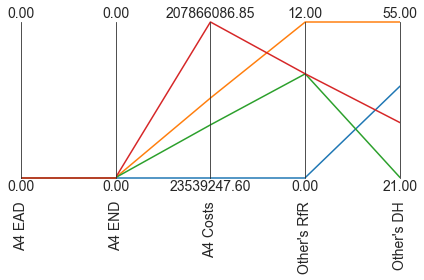

In [152]:
from ema_workbench.analysis import parcoords
from matplotlib.pyplot import figure
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5, forward=True)

newlimits = parcoords.get_limits(newoutcomes)
newaxes = parcoords.ParallelAxes(newlimits)
newaxes.plot(newoutcomes)


# we invert this axis so direction of desirability is the same 
#newaxes.invert_axis('max_P')
plt.show()

We aim to have the policies that minimize all outcome of interests, hence have the line as near as possible to the bottom point. Then, the blue one is the best among all.